In [72]:
import numpy as np
import pandas as pd
import random
from datetime import datetime
import matplotlib.pyplot as plt

# Analisi dei dati ottenuti
Una volta concluso il vostro task e dopo aver lavorato per gli altri Requester, analizzate i
risultati ottenuti> 
a. Scaricate i dati prodotti dai lavoratori utilizzando lo script di download descritto azione
le

1. Dati workers_acl.csv sono i dati presenti su dynamodb tabella ACL
2. worker_answers.csv sono le singole risposte alle review per ciascun worker
3. workers_dimensions_selection.csv confidence per ogni hit
4. workers_questionnaire.csv risposte alle prime due domandione

## WORKERS_ACL

In [76]:
workers_acl = pd.read_csv("result/ProgettoSocial/DataFrame/workers_acl.csv")
print(f"Current Number of Responses: {workers_acl.shape[0]}")
# print(workers_acl.info())
interesting_columns = ['worker_id', 'unit_id','time_arrival','time_submit','time_completion']
workers_acl = workers_acl[interesting_columns]
workers_acl.info()

Current Number of Responses: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   worker_id        13 non-null     object
 1   unit_id          13 non-null     object
 2   time_arrival     13 non-null     object
 3   time_submit      13 non-null     object
 4   time_completion  13 non-null     object
dtypes: object(5)
memory usage: 652.0+ bytes


> Conversione data to timestamp() in numero di secondi da unix epoch

In [77]:
workers_acl['time_arrival'] = [datetime.strptime(val, "%a, %d %b %Y %H:%M:%S %Z").timestamp() for val in workers_acl['time_arrival']]
workers_acl['time_submit'] = [datetime.strptime(val, "%a, %d %b %Y %H:%M:%S %Z").timestamp() for val in workers_acl['time_submit']]
workers_acl['time_completion'] = [datetime.strptime(val, "%a, %d %b %Y %H:%M:%S %Z").timestamp() for val in workers_acl['time_completion']]

1. Distribuzione differenza idle_time = time_submit - time_arrival
2. Distribuzione differenza working_time = time_completion - time_submit


In [78]:
workers_acl['idle_time'] = workers_acl['time_submit'] - workers_acl['time_arrival']
workers_acl['working_time'] = workers_acl['time_completion'] - workers_acl['time_submit']

In [80]:
workers_acl[['idle_time','working_time']].describe()

,idle_time,working_time
count,13.000000,13.000000
mean,4.076923,1737.846154
std,1.846688,1400.261097
min,2.000000,464.000000
25%,3.000000,738.000000
50%,3.000000,1408.000000
75%,5.000000,2011.000000
max,8.000000,5666.000000


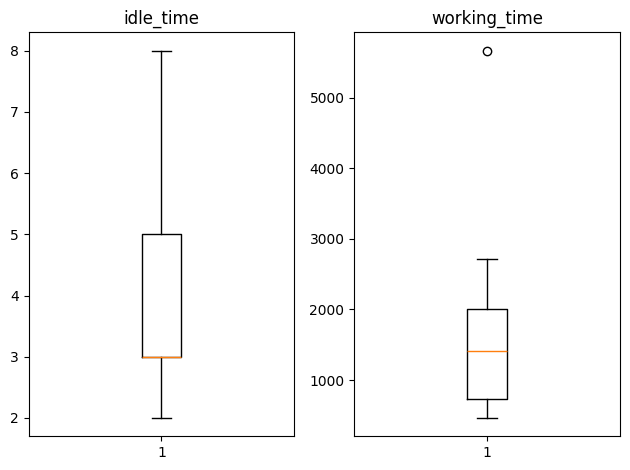

In [79]:
fig, axes = plt.subplots(ncols=2)
# Iterate over each column and create a boxplot
for i, column in enumerate(['idle_time','working_time']):
    axes[i].boxplot(workers_acl[column])
    axes[i].set_title(column)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

## workers_answers

In [ ]:
workers_answers = pd.read_csv("result/ProgettoSocial/DataFrame/workers_answers.csv")
workers_answers.info()
# print(workers_answers.groupby('unit_id').count())
# la unit_9 contiene 9 righe
# ordinare per tempo decrescente per document_index per gestire gli eventuali passi indietro
# mantenere worker_id, unit_id, action, document_index, (label,value) per ogni dimensione

In [ ]:
# boxplot  per ogni unita per valutare gli outlier

In [5]:
workers_dimensions_selection = pd.read_csv("result/ProgettoSocial/DataFrame/workers_dimensions_selection.csv")
workers_dimensions_selection.info()
# media della confidence_value per ogni review
# worker_id, unit_id, , selection_value in base all'ultimo selection_index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   worker_id                   119 non-null    object 
 1   paid                        119 non-null    bool   
 2   task_name                   119 non-null    object 
 3   batch_name                  119 non-null    object 
 4   unit_id                     119 non-null    object 
 5   try_last                    119 non-null    int64  
 6   try_current                 119 non-null    int64  
 7   dimension_index             119 non-null    int64  
 8   dimension_name              119 non-null    object 
 9   timestamp_start             119 non-null    float64
 10  timestamp_start_parsed      119 non-null    object 
 11  selection_index             119 non-null    int64  
 12  selection_value             119 non-null    int64  
 13  selection_timestamp         119 non

In [7]:
# worker_documents.csv 
# mantenere worker_ids (lista dei worker che hanno lavorato), unit_ids (lista delle unità in cui è presente la review)
# product_id = Review_ID 
workers_documents = pd.read_csv("result/ProgettoSocial/DataFrame/workers_documents.csv")
workers_documents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   document_id    15 non-null     object
 1   text           15 non-null     object
 2   product_title  15 non-null     object
 3   product_brand  15 non-null     object
 4   time           15 non-null     object
 5   task_type      15 non-null     object
 6   unit_ids       15 non-null     object
 7   worker_ids     15 non-null     object
dtypes: object(8)
memory usage: 1.1+ KB


In [11]:
workers_questionnaire = pd.read_csv("result/ProgettoSocial/DataFrame/workers_questionnaire.csv")
#workers_questionnaire.info()
# categorizzare gli utenti in base a genere eta ecc
# question_answer_text contiene il valore selezionato dal worker
workers_questionnaire[workers_questionnaire['questionnaire_type'] == 'crt']['question_answer_value']

5     3.0
11    3.0
17    3.0
23    3.0
29    3.0
35    3.0
41    3.0
47    1.0
53    1.0
59    3.0
65    3.0
71    3.0
77    3.0
Name: question_answer_value, dtype: float64

b. Calcolate le frequenze relative delle risposte date dai lavoratori al questionario  
> File workers_questionnaire.csv

c. Calcolate il percent agreement tra worker per i valori forniti rispetto a ciascuna
dimensione categoriale
d. Calcolate la confidence media espressa dai worker nel valutare ciascuna
recensione
e. Calcolate il tempo medio impiegato dai worker per valutare ciascuna recensione
f. Descrivete brevemente le considerazioni tratte dall’analisi dei dati prodotti dai worker
○ Quali sono le caratteristiche demografiche e culturali dei lavoratori che potete
dedurre dal questionario?
○ Vi è accordo tra ciascun lavoratore? Per quali dimensioni vi è più accordo?
Per quali meno?
○ …
g. Aggiungete eventuali altre analisi che ritenete opportune ed utili con i dati che avete
a disposizione
a disposizione